<a href="https://colab.research.google.com/github/Skshamim02/Navigating-the-Stock-Market-with-Data-Science/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials


In [14]:
import yfinance as yf

wipro_df = yf.download('WIPRO.NS',
                      start='2000-01-01',
                      end='2023-08-31',
                      progress=False,
)
print(wipro_df.head())

                  Open        High         Low       Close  Adj Close   Volume
Date                                                                          
2000-01-03  102.150002  102.157501  102.150002  102.157501  83.336517    42639
2000-01-04  110.330627  110.330627  110.330627  110.330627  90.003868   117119
2000-01-05  110.330627  119.158127  101.812508  112.128754  91.470703  3527919
2000-01-06  117.926254  119.362503  104.625008  109.959381  89.701027  1942399
2000-01-07  103.162506  103.162506  101.163757  101.163757  82.525871   269599


In [15]:
print(wipro_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03  102.150002  102.157501  102.150002  102.157501   83.336517   
2000-01-04  110.330627  110.330627  110.330627  110.330627   90.003868   
2000-01-05  110.330627  119.158127  101.812508  112.128754   91.470703   
2000-01-06  117.926254  119.362503  104.625008  109.959381   89.701027   
2000-01-07  103.162506  103.162506  101.163757  101.163757   82.525871   
...                ...         ...         ...         ...         ...   
2023-08-24  418.750000  420.000000  412.000000  412.700012  412.700012   
2023-08-25  410.000000  411.299988  407.100006  409.700012  409.700012   
2023-08-28  411.450012  412.450012  407.649994  408.049988  408.049988   
2023-08-29  409.649994  411.899994  407.100006  408.100006  408.100006   
2023-08-30  410.000000  410.200012  406.649994  407.200012  407.200012   

             Volume  
Date           

<Axes: title={'center': "WIPRO.NS's stock price"}, xlabel='Date'>

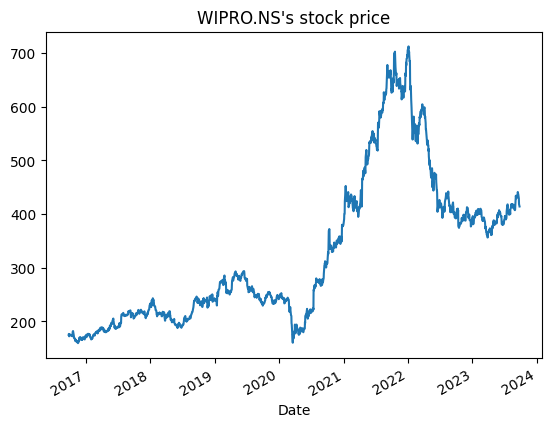

In [16]:
ticker = yf.Ticker('WIPRO.NS')
wipro_df = ticker.history(period="7y")
wipro_df['Close'].plot(title="WIPRO.NS's stock price")

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [18]:
wipro_df = wipro_df.reset_index()[['Close', 'High', 'Low', 'Open']]



In [19]:
wipro_df

,Close,High,Low,Open
0,174.577850,175.197047,173.412287,174.978500
1,176.362595,176.653986,174.468576,174.960299
2,176.180511,176.544746,174.960333,176.435473
3,171.991791,176.271552,171.190477,176.180493
4,174.450378,174.832828,172.283183,172.283183
...,...,...,...,...
1726,436.100006,441.049988,435.200012,441.049988
1727,430.100006,436.850006,429.049988,434.250000
1728,428.950012,431.250000,423.049988,429.899994
1729,418.500000,426.750000,416.600006,424.399994


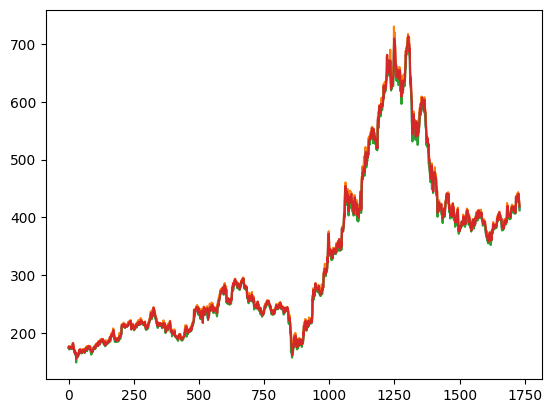

In [20]:
plt.plot(wipro_df)

In [21]:
wipro_df=wipro_df.iloc[:,1:2].values

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
wipro_df=scaler.fit_transform(np.array(wipro_df).reshape(-1,1))


In [23]:
print(wipro_df)

[[0.02493193]
 [0.02748905]
 [0.02729732]
 ...
 [0.47433911]
 [0.46644101]
 [0.45415508]]


In [24]:
#splitting dataset into train and test split
training_size=int(len(wipro_df)*0.65)
test_size=len(wipro_df)-training_size
train_data,test_data=wipro_df[0:training_size,:],wipro_df[training_size:len(wipro_df),:1]

In [25]:
training_size,test_size

(1125, 606)

In [26]:
train_data

array([[0.02493193],
       [0.02748905],
       [0.02729732],
       ...,
       [0.47594972],
       [0.47057579],
       [0.53853065]])

In [27]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(1024, 100)
(1024,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(505, 100)
(505,)


(None, None)

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(3))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 50953 (199.04 KB)
Trainable params: 50953 (199.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
16/16 [==============================] - 18s 482ms/step - loss: 0.0103 - val_loss: 0.0378
Epoch 2/100
16/16 [==============================] - 3s 219ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 3/100
16/16 [==============================] - 3s 162ms/step - loss: 9.0781e-04 - val_loss: 0.0027
Epoch 4/100
16/16 [==============================] - 3s 174ms/step - loss: 7.1473e-04 - val_loss: 0.0034
Epoch 5/100
16/16 [==============================] - 3s 186ms/step - loss: 5.9692e-04 - val_loss: 0.0023
Epoch 6/100
16/16 [==============================] - 2s 152ms/step - loss: 5.7383e-04 - val_loss: 0.0021
Epoch 7/100
16/16 [==============================] - 2s 144ms/step - loss: 5.3813e-04 - val_loss: 0.0020
Epoch 8/100
16/16 [==============================] - 2s 145ms/step - loss: 5.1607e-04 - val_loss: 0.0019
Epoch 9/100
16/16 [==============================] - 3s 160ms/step - loss: 5.2236e-04 - val_loss: 0.0023
Epoch 10/100
16/16 [==============================] - 3s 190ms

In [35]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 2s 32ms/step


In [36]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
import math
from sklearn.metrics import mean_squared_error

# Calculate RMSE for each column in train_predict
rmse_values = [math.sqrt(mean_squared_error(y_train, train_predict[:, i])) for i in range(train_predict.shape[1])]

# Calculate the overall RMSE by averaging the individual RMSE values
overall_rmse = sum(rmse_values) / len(rmse_values)

print("RMSE for each column:", rmse_values)
print("Overall RMSE:", overall_rmse)


RMSE for each column: [259.18306462113395, 259.23865361277404, 259.76295668196144]
Overall RMSE: 259.39489163862316


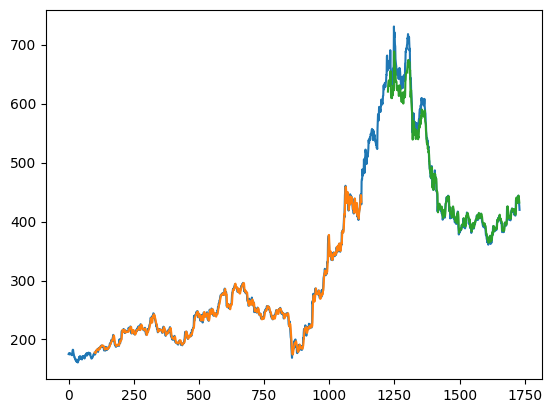

In [45]:

# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty(len(wipro_df))
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back] = train_predict[:, 0]  # Assuming you want the first column of train_predict

# shift test predictions for plotting
testPredictPlot = np.empty(len(wipro_df))
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(wipro_df) - 1] = test_predict[:, 0]  # Assuming you want the first column of test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(wipro_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [46]:
len(test_data)

606

In [47]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 265)

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [49]:
temp_input

[0.43816328244616976,
 0.4400891745742579,
 0.43177276636347117,
 0.4306347681467678,
 0.4332609752234642,
 0.4428905323000031,
 0.45181974418752047,
 0.4604862500244885,
 0.463287592824999,
 0.45750989019889776,
 0.454358399247627,
 0.4400891689113422,
 0.4286213191342959,
 0.4342239429649166,
 0.4280960615109132,
 0.4183790009897862,
 0.4167157077204585,
 0.41636558791485423,
 0.4202173543733011,
 0.41864161615840556,
 0.42109277228473707,
 0.4119885193699352,
 0.414264572654069,
 0.42827112375700016,
 0.4405268936289468,
 0.4383383643087596,
 0.4414023359860323,
 0.4491059106715767,
 0.43457410499383675,
 0.40437244908131753,
 0.3958809590179032,
 0.38091145089523737,
 0.3901907907875265,
 0.38485082642272994,
 0.3873019529730174,
 0.38852747097750806,
 0.3939550333718167,
 0.3940426050406084,
 0.3949180143966765,
 0.3929921168336271,
 0.39745667313167254,
 0.40551046183015693,
 0.40874948101603537,
 0.40682357798715973,
 0.4044599611309093,
 0.40874952114116836,
 0.4079616150028038

In [72]:
lst_output = []
n_steps = 100
i = 0

while i < 10:  # Predict for the next 10 days
    if len(temp_input) >= n_steps:  # Adjusted to ensure at least 100 elements
        x_input = np.array(temp_input[-n_steps:])  # Take the last 100 elements
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i, x_input))
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i, x_input))
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        i += 1

print(lst_output)


0 day input [[[0.41501561]
  [0.3995704 ]
  [0.38789878]
  [0.39307644]
  [0.39711323]
  [0.39491931]
  [0.38965391]
  [0.38772325]
  [0.39184783]
  [0.38895187]
  [0.40150106]
  [0.40878486]
  [0.41484009]
  [0.41141756]
  [0.41413805]
  [0.41501561]
  [0.41220739]
  [0.4068542 ]
  [0.40887265]
  [0.41703401]
  [0.42914442]
  [0.46328179]
  [0.45512038]
  [0.45634899]
  [0.45459386]
  [0.44467736]
  [0.43353225]
  [0.42914442]
  [0.42580968]
  [0.43107508]
  [0.42449333]
  [0.43002199]
  [0.43353225]
  [0.42984646]
  [0.42300145]
  [0.43704252]
  [0.44230792]
  [0.45020602]
  [0.45196116]
  [0.45599794]
  [0.45836739]
  [0.44792437]
  [0.45494491]
  [0.4552959 ]
  [0.44818763]
  [0.44994277]
  [0.45125912]
  [0.45099586]
  [0.45459386]
  [0.43932417]
  [0.44134262]
  [0.44037726]
  [0.43739357]
  [0.43704252]
  [0.45064481]
  [0.48355357]
  [0.4853087 ]
  [0.48188617]
  [0.47863921]
  [0.47820043]
  [0.4853087 ]
  [0.49232924]
  [0.48609853]
  [0.49540072]
  [0.49627829]
  [0.4915394 

In [73]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [59]:
len(wipro_df)

1731

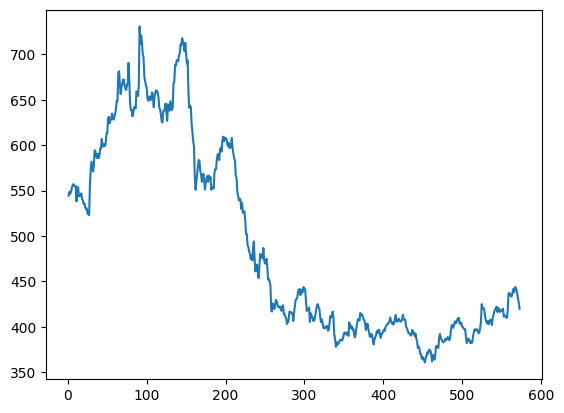

In [79]:
# Ensure day_new has the same length as the data you're plotting
day_new = np.arange(len(data_to_plot)) + 1

# Now, you can plot both arrays
plt.plot(day_new, data_to_plot)
